# recruitment curve analysis

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
plt.rcParams.update({
    "font.family": "serif",
    "mathtext.fontset": "cm",  # Computer Modern (LaTeX default)
    "font.size": 12
})

In [16]:
df = pd.read_csv("Results.csv")

In [17]:
df["Recruitment"] = (df["IntDen(IR)"] - df["IntDen(Background)"]) / (df["IntDen(Nucleus)"] - df["IntDen(Background)"]) 
df["Recruitment_std"] = df["StdDev(IR)"] / (df["IntDen(Nucleus)"] - df["IntDen(Background)"])
time = np.linspace(0,30,len(df["Recruitment"]))

In [18]:
def exp_decay(time,A,M,tau):
    return A*np.exp(-time/tau) + M

R² = 0.9731


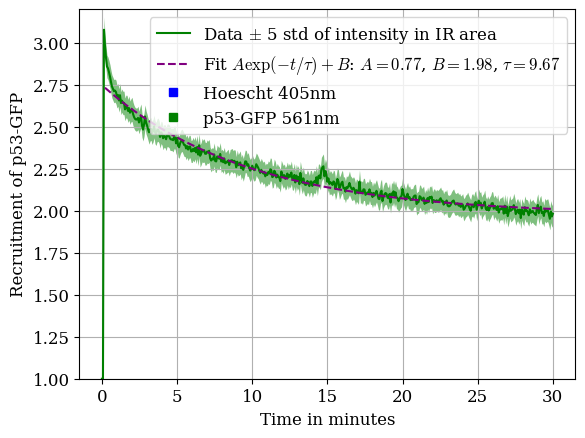

In [ ]:

recruitment = df["Recruitment"].values + 1 - df["Recruitment"][0]
frames_pre_IR = 3  # cf movie

# Fit the model
params, covariance = curve_fit(exp_decay, time[frames_pre_IR:], recruitment[frames_pre_IR:])
A_fit, M_fit, tau_fit = params

# Optional: generate fitted values
fitted_values = exp_decay(time[frames_pre_IR:], A_fit, M_fit, tau_fit)

# R² calculation
residuals = recruitment[frames_pre_IR:] - fitted_values
ss_res = np.sum(residuals ** 2)
ss_tot = np.sum((recruitment[frames_pre_IR:] - np.mean(recruitment[frames_pre_IR:])) ** 2)
r_squared = 1 - (ss_res / ss_tot)
print(f"R² = {r_squared:.4f}")

# Plot data and fit
plt.plot(time, recruitment, label=r'Data $\pm$ 5 std of intensity in IR area', color="green")
plt.plot(time[frames_pre_IR:], fitted_values, '--', 
         label=fr"Fit $A\exp(-t/\tau)+B$: $A = {A_fit:.2f}$, $B = {M_fit:.2f}$, $\tau = {tau_fit:.2f}$", 
         color="purple")

# Error band
plt.fill_between(time, recruitment - 5*df["Recruitment_std"], recruitment + 5*df["Recruitment_std"],
                 alpha=0.5, linewidth=0, color="green")

# Dummy plots for legend squares
plt.plot([], [], 's', color='blue', label='Hoescht 405nm')
plt.plot([], [], 's', color='green', label='p53-GFP 561nm')

# Labels and style
plt.xlabel("Time in minutes")
plt.ylabel("Recruitment of p53-GFP")
plt.grid()
plt.ylim(1, 3.2)
plt.legend(loc="upper right")
plt.savefig("recruitment.svg")
plt.show()

R² = 0.9731


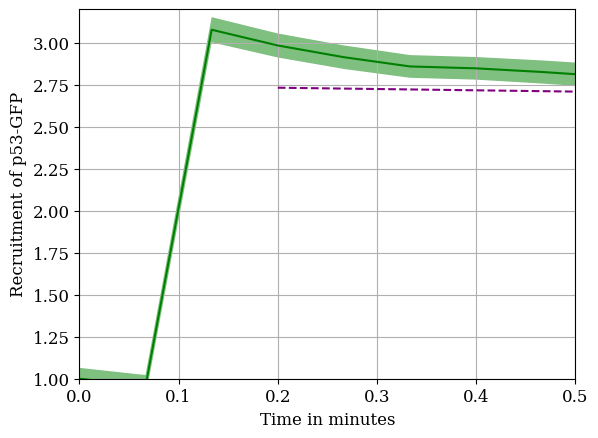

In [20]:

recruitment = df["Recruitment"].values + 1 - df["Recruitment"][0]
frames_pre_IR = 3  # cf movie

# Fit the model
params, covariance = curve_fit(exp_decay, time[frames_pre_IR:], recruitment[frames_pre_IR:])
A_fit, M_fit, tau_fit = params

# Optional: generate fitted values
fitted_values = exp_decay(time[frames_pre_IR:], A_fit, M_fit, tau_fit)

# R² calculation
residuals = recruitment[frames_pre_IR:] - fitted_values
ss_res = np.sum(residuals ** 2)
ss_tot = np.sum((recruitment[frames_pre_IR:] - np.mean(recruitment[frames_pre_IR:])) ** 2)
r_squared = 1 - (ss_res / ss_tot)
print(f"R² = {r_squared:.4f}")

# Plot data and fit
plt.plot(time, recruitment, label=r'Data $\pm$ 5 std of intensity in IR area', color="green")
plt.plot(time[frames_pre_IR:], fitted_values, '--', 
         label=fr"Fit $A\exp(-t/\tau)+B$: $A = {A_fit:.2f}$, $B = {M_fit:.2f}$, $\tau = {tau_fit:.2f}$", 
         color="purple")

# Error band
plt.fill_between(time, recruitment - 5*df["Recruitment_std"], recruitment + 5*df["Recruitment_std"],
                 alpha=0.5, linewidth=0, color="green")

# Dummy plots for legend squares
plt.plot([], [], 's', color='blue', label='Hoescht 405nm')
plt.plot([], [], 's', color='green', label='p53-GFP 561nm')

# Labels and style
plt.xlabel("Time in minutes")
plt.ylabel("Recruitment of p53-GFP")
plt.grid()
plt.ylim(1, 3.2)
plt.xlim(0,0.5
         )
#plt.legend(loc="upper right")
plt.show()